In [2]:
!pip install conllu

In [3]:
from conllu import parse_incr
from collections import Counter, defaultdict
import os

# File paths
train_file_path = 'en_atis-ud-train.conllu'
dev_file_path = 'en_atis-ud-dev.conllu'
test_file_path = 'en_atis-ud-test.conllu'


UNK = "<UNK>"
PAD = "<PAD>"
START = "<START>"
END = "<END>"

def load_and_preprocess_conllu(file_path):
    """
    Load a .conllu file, preprocess it by filtering out non-alphabetic tokens,
    and return sentences and their corresponding POS tags.
    """
    sentences = []
    pos_tags = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for tokenlist in parse_incr(file):
            sentence = []
            tags = []
            for token in tokenlist:
                if token['form'].isalpha(): 
                    sentence.append(token['form'].lower())
                    tags.append(token['upos'])
            sentences.append([START] + sentence + [END])
            # sentences.append(sentence)
            pos_tags.append([PAD] + tags + [PAD])
            # pos_tags.append(tags)
    return sentences, pos_tags




In [4]:
train_sentences, train_pos_tags = load_and_preprocess_conllu(train_file_path)
dev_sentences, dev_pos_tags = load_and_preprocess_conllu(dev_file_path)
test_sentences, test_pos_tags = load_and_preprocess_conllu(test_file_path)

all_sentences = train_sentences + dev_sentences

word_freq = Counter([word for sentence in all_sentences for word in sentence])
print(word_freq)

word_to_check = 'an'
occurrences = word_freq.get(word_to_check, 0)
print(f"The word '{word_to_check}' occurs {occurrences} times in all_sentences.")

word_to_check = 'an'
pos_tags_for_word = []

for sentence, pos_tags in zip(all_sentences, train_pos_tags + dev_pos_tags):
    if word_to_check in sentence:
        indices = [i for i, word in enumerate(sentence) if word == word_to_check]
        for i in indices:
            if i < len(pos_tags):  
                pos_tags_for_word.append(pos_tags[i])

print(f"The word '{word_to_check}' occurs {len(pos_tags_for_word)} times in all_sentences.")
print("POS tags for the word 'an':", pos_tags_for_word)


for train_sentence, train_pos_tag in zip(train_sentences, train_pos_tags):
    if len(train_sentence) != len(train_pos_tag):
        print("Mismatch found in train set!")
        break
else:
    print("All sentences in train set have matching number of words and POS tags.")

for dev_sentence, dev_pos_tag in zip(dev_sentences, dev_pos_tags):
    if len(dev_sentence) != len(dev_pos_tag):
        print("Mismatch found in dev set!")
        break
else:
    print("All sentences in dev set have matching number of words and POS tags.")



Counter({'<START>': 4846, '<END>': 4846, 'to': 4200, 'from': 3627, 'flights': 2342, 'the': 2021, 'on': 1502, 'what': 1220, 'flight': 1186, 'me': 1138, 'i': 1005, 'show': 947, 'san': 944, 'boston': 944, 'a': 924, 'denver': 876, 'in': 810, 'francisco': 782, 'and': 774, 'atlanta': 658, 'is': 612, 'dallas': 580, 'pittsburgh': 577, 'all': 554, 'list': 542, 'baltimore': 494, 'philadelphia': 479, 'like': 474, 'are': 432, 'airlines': 412, 'of': 367, 'that': 361, 'between': 357, 'washington': 347, 'pm': 311, 'please': 310, 'leaving': 306, 'morning': 300, 'would': 282, 'fly': 269, 'city': 262, 'for': 257, 'need': 241, 'first': 237, 'wednesday': 236, 'fare': 233, 'after': 228, 'oakland': 220, 'there': 217, 'trip': 212, 'cheapest': 205, 'ground': 203, 'you': 201, 'round': 199, 'arriving': 196, 'transportation': 194, 'which': 192, 'class': 191, 'does': 189, 'before': 187, 'with': 178, 'afternoon': 175, 'milwaukee': 174, 'available': 172, 'have': 171, 'american': 170, 'at': 170, 'new': 167, 'one': 1

In [5]:
print(test_sentences[:4])
print(test_pos_tags[:4])

[['<START>', 'what', 'are', 'the', 'coach', 'flights', 'between', 'dallas', 'and', 'baltimore', 'leaving', 'august', 'tenth', 'and', 'returning', 'august', 'twelve', '<END>'], ['<START>', 'i', 'want', 'a', 'flight', 'from', 'nashville', 'to', 'seattle', 'that', 'arrives', 'no', 'later', 'than', 'pm', '<END>'], ['<START>', 'i', 'need', 'a', 'flight', 'leaving', 'kansas', 'city', 'to', 'chicago', 'leaving', 'next', 'wednesday', 'and', 'returning', 'the', 'following', 'day', '<END>'], ['<START>', 'explain', 'meal', 'codes', 'sd', 'd', '<END>']]
[['<PAD>', 'PRON', 'AUX', 'DET', 'NOUN', 'NOUN', 'ADP', 'PROPN', 'CCONJ', 'PROPN', 'VERB', 'NOUN', 'ADJ', 'CCONJ', 'VERB', 'NOUN', 'NUM', '<PAD>'], ['<PAD>', 'PRON', 'VERB', 'DET', 'NOUN', 'ADP', 'PROPN', 'ADP', 'PROPN', 'ADP', 'VERB', 'DET', 'ADJ', 'ADP', 'NOUN', '<PAD>'], ['<PAD>', 'PRON', 'VERB', 'DET', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'ADP', 'PROPN', 'VERB', 'ADJ', 'NOUN', 'CCONJ', 'VERB', 'DET', 'VERB', 'NOUN', '<PAD>'], ['<PAD>', 'VERB', 'NO

In [6]:
def replace_low_freq_words(sentences, word_freq, threshold=2):
    """
    Replace words with frequency less than threshold with <unk>.
    """
    processed_sentences = []
    for sentence in sentences:
        processed_sentence = [word if word_freq[word] >= threshold else UNK for word in sentence]
        processed_sentences.append(processed_sentence)
    return processed_sentences

train_sentences = replace_low_freq_words(train_sentences, word_freq)
dev_sentences = replace_low_freq_words(dev_sentences, word_freq)

def count_unk(sentences):
    count = 0
    for sentence in sentences:
        count += sentence.count('<UNK>')
    return count



unk_count_train = count_unk(train_sentences)
unk_count_dev = count_unk(dev_sentences)
unk_count_test = count_unk(test_sentences)

print("Number of words replaced with <unk> in the train set:", unk_count_train)
print("Number of words replaced with <unk> in the dev set:", unk_count_dev)
print("Number of words replaced with <unk> in the test set:", unk_count_test)



Number of words replaced with <unk> in the train set: 162
Number of words replaced with <unk> in the dev set: 18
Number of words replaced with <unk> in the test set: 0


In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchtext.vocab as vocab


glove = vocab.GloVe(name='6B', dim=100)  # Load 100-dimensional GloVe embeddings




.vector_cache/glove.6B.zip: 862MB [02:39, 5.42MB/s]                           
100%|█████████▉| 399999/400000 [00:24<00:00, 16566.61it/s]


In [8]:
embedding_dim = 100
word_to_ix = {word: index + 1 for index, word in enumerate(glove.itos)}  
word_to_ix[UNK] = len(word_to_ix) + 1
word_to_ix[PAD] = len(word_to_ix) + 1
word_to_ix[START] = len(word_to_ix) + 1
word_to_ix[END] = len(word_to_ix) + 1

embedding_matrix = torch.zeros((len(word_to_ix) + 1, embedding_dim))  
for word, idx in word_to_ix.items():
    if word in glove.stoi:
        embedding_matrix[idx] = glove.vectors[glove.stoi[word]]
    else:  
        embedding_matrix[idx] = torch.randn(embedding_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

embedding_matrix = embedding_matrix.to(device)  

pos_tags = set([tag for sentence in train_pos_tags for tag in sentence])

tag_to_ix = {'<PAD>': 0, 'CCONJ': 1, 'NOUN': 2, 'AUX': 3, 'PRON': 4, 'DET': 5, 'ADP': 6, 'NUM': 7, 'ADJ': 8, 'ADV': 9, 'PART': 10, 'PROPN': 11, 'INTJ': 12, 'VERB': 13, '<UNK>': 14, 'SYM': 15}
idx_to_tag = {idx: tag for tag, idx in tag_to_ix.items()}
idx_to_word = {idx: word for word, idx in word_to_ix.items()}



In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class POSDataset(Dataset):
    def __init__(self, sentences, tags, word_to_ix, tag_to_ix, p, s, embedding_matrix):
        self.sentences = sentences
        self.tags = tags
        self.word_to_ix = word_to_ix
        self.tag_to_ix = tag_to_ix
        self.p = p
        self.s = s
        self.embedding_matrix = embedding_matrix

    def __len__(self):
        return sum(len(sentence) for sentence in self.sentences)

    def __getitem__(self, idx):
        sentence_idx, token_idx = 0, idx
        for sentence in self.sentences:
            if token_idx < len(sentence):
                break
            token_idx -= len(sentence)
            sentence_idx += 1

        context_window_indices = []
        for i in range(token_idx - self.p, token_idx + self.s + 1):
            if i < 0 or i >= len(self.sentences[sentence_idx]):  
                context_window_indices.append(self.word_to_ix[PAD])  
            else:
                word = self.sentences[sentence_idx][i]
                context_window_indices.append(self.word_to_ix.get(word, self.word_to_ix[UNK])) 
        context_indices_tensor = torch.tensor(context_window_indices, dtype=torch.long).to(device)
        context_embeddings = self.embedding_matrix[context_indices_tensor].view(-1)

        tag = self.tags[sentence_idx][token_idx] if token_idx < len(self.tags[sentence_idx]) else UNK
        tag_idx = self.tag_to_ix.get(tag, self.tag_to_ix[UNK])

        # tag = self.tags[sentence_idx][token_idx]
        # tag_idx = self.tag_to_ix.get(tag, self.tag_to_ix[UNK]

        return context_embeddings, tag_idx


dev_accuracies = []
test_accuracies = []

p = 1
s = 1

dataset_tr = POSDataset(train_sentences, train_pos_tags, word_to_ix, tag_to_ix, p, s, embedding_matrix=embedding_matrix)
dataset_dev = POSDataset(dev_sentences, dev_pos_tags, word_to_ix, tag_to_ix, p, s, embedding_matrix = embedding_matrix)

In [ ]:
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    inputs, targets = zip(*batch)

    padded_inputs = pad_sequence(inputs, batch_first=True, padding_value=0)

    return padded_inputs, torch.tensor(targets)

train_dataloader = DataLoader(dataset_tr, batch_size=32, shuffle=True, collate_fn=collate_batch)
dev_dataloader = DataLoader(dataset_dev, batch_size=32, shuffle=False, collate_fn=collate_batch)


In [ ]:
#this is the real deal
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm



# class FFN_POS_Tagger(nn.Module):
#     def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim):
#         super(FFN_POS_Tagger, self).__init__()
#         self.input_dim = input_dim
#         self.hidden_dim = hidden_dim
#         self.output_dim = output_dim
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.relu1 = nn.ReLU()  # Changed name to relu1
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
#         self.relu2 = nn.ReLU()  # Changed name to relu2
#         self.fc3 = nn.Linear(hidden_dim2, output_dim)


#     def forward(self, x):
#         batch_size = x.size(0)  # Get the batch size
#         x = x.view(batch_size, -1)  # Flatten input
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         return x

In [ ]:
import torch
import torch.nn as nn

class FFN_POS_Tagger(nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim, activation):
        super(FFN_POS_Tagger, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.activation1 = self.get_activation(activation)  
        self.activation2 = self.get_activation(activation)  
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def get_activation(self, activation):
        if activation == 'ReLU':
            return nn.ReLU()
        elif activation == 'Tanh':
            return nn.Tanh()
        else:
            raise ValueError("Invalid activation function. Choose 'ReLU' or 'Tanh'.")

    def forward(self, x):
        batch_size = x.size(0)  
        x = x.view(batch_size, -1)  
        x = self.fc1(x)
        x = self.activation1(x)
        x = self.fc2(x)
        x = self.activation2(x)
        x = self.fc3(x)
        return x


In [ ]:


def train(model, train_dataloader, dev_loader, criterion, optimizer, device, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch"):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_dataloader)}")
        evaluate(model, dev_dataloader, criterion, device)

def evaluate(model, dev_dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in tqdm(dev_dataloader, desc="Evaluation", unit="batch"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)
    accuracy = correct / total
    print(f"Validation Loss: {total_loss / len(dev_dataloader)}, Accuracy: {accuracy}")

In [ ]:


input_dim = embedding_dim * (p + s + 1)  
hidden_dim = 512
hidden_dim2 = 128
output_dim = len(tag_to_ix) 

model = FFN_POS_Tagger(input_dim, hidden_dim, hidden_dim2, output_dim, activation='ReLU').to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model

train(model, train_dataloader, dev_dataloader, criterion, optimizer, device)

Epoch 1/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.15batch/s]


Epoch 1/10, Loss: 0.14401218783286665


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 306.79batch/s]


Validation Loss: 0.08111529218760796, Accuracy: 0.975388260068439


Epoch 2/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.94batch/s]


Epoch 2/10, Loss: 0.05989847131041876


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 315.02batch/s]


Validation Loss: 0.07392070347312622, Accuracy: 0.9807844169518294


Epoch 3/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.73batch/s]


Epoch 3/10, Loss: 0.0496020943989549


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.93batch/s]


Validation Loss: 0.07256923521776071, Accuracy: 0.9847328244274809


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.50batch/s]


Epoch 4/10, Loss: 0.04412760300981712


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 292.99batch/s]


Validation Loss: 0.06799179509449887, Accuracy: 0.9847328244274809


Epoch 5/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.16batch/s]


Epoch 5/10, Loss: 0.0394761937586757


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 296.27batch/s]


Validation Loss: 0.08705036710769094, Accuracy: 0.9776256909713082


Epoch 6/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.77batch/s]


Epoch 6/10, Loss: 0.038313363622487356


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 308.42batch/s]


Validation Loss: 0.07093862308876943, Accuracy: 0.9813108712819163


Epoch 7/10: 100%|██████████| 1750/1750 [00:38<00:00, 46.03batch/s]


Epoch 7/10, Loss: 0.036462224765512606


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 296.54batch/s]


Validation Loss: 0.06696956930198655, Accuracy: 0.9853908923400895


Epoch 8/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.23batch/s]


Epoch 8/10, Loss: 0.03327296094100243


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 322.16batch/s]


Validation Loss: 0.07677283440150041, Accuracy: 0.9853908923400895


Epoch 9/10: 100%|██████████| 1750/1750 [00:33<00:00, 53.03batch/s]


Epoch 9/10, Loss: 0.03395058430178103


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 261.82batch/s]


Validation Loss: 0.07869064228781555, Accuracy: 0.9838115293498289


Epoch 10/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.85batch/s]


Epoch 10/10, Loss: 0.03384898116816703


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.44batch/s]

Validation Loss: 0.08117378560669909, Accuracy: 0.9831534614372203


In [ ]:
def calculate_accuracy_ffnn(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.view(-1).to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  
            correct += (predicted == targets).sum().item()
            total += targets.size(0)  
    accuracy = correct / total
    return accuracy

dev_accuracy = calculate_accuracy_ffnn(model, dev_dataloader, device)
print(f'Dev Set Accuracy: {dev_accuracy}')

dev_accuracies.append(dev_accuracy)

print(dev_accuracies)

Dev Set Accuracy: 0.9831534614372203
[0.9653856277967886, 0.9847328244274809, 0.9828902342721769, 0.9780205317188734, 0.9774940773887866, 0.9831534614372203]


dev_acc
* for 0 = 0.9653856277967886
* for 1 = 0.9847328244274809
* for 2 = 0.9828902342721769
* for 3 = 0.9780205317188734
* for 4 = 0.9774940773887866
* for 3,4 = 0.9792050539615689

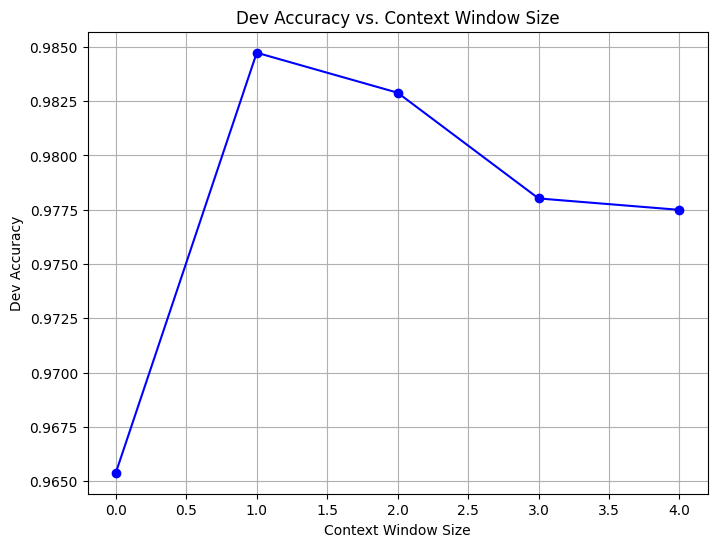

In [ ]:
import matplotlib.pyplot as plt

context_window_sizes = [0, 1, 2, 3, 4]
dev_accuracies = [0.9653856277967886, 0.9847328244274809, 0.9828902342721769, 0.9780205317188734, 0.9774940773887866]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(context_window_sizes, dev_accuracies, marker='o', linestyle='-', color='b')
plt.title('Dev Accuracy vs. Context Window Size')
plt.xlabel('Context Window Size')
plt.ylabel('Dev Accuracy')
plt.grid(True)
plt.show()


In [ ]:
idx_to_tag = {idx: tag for tag, idx in tag_to_ix.items()}
idx_to_word = {idx: word for word, idx in word_to_ix.items()}


In [ ]:
def test(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    target_tags=[]
    predicted_tags=[]
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc="Testing", unit="batch"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            # print(f'target:{targets}')
            # for target in targets:
            #   target_tags.append(idx_to_tag(target))
            # print(f' predicted: {predicted}')
            # for predict in predicted:
            #   predicted_tags.append(idx_to_tag(predict))
            # print()
            correct += (predicted == targets).sum().item()
            total += targets.size(0)

    accuracy = correct / total
    print(f"Test Loss: {total_loss / len(test_loader)}, Accuracy: {accuracy}")
    return accuracy

dataset_test = POSDataset(test_sentences, test_pos_tags, word_to_ix, tag_to_ix, p, s, embedding_matrix = embedding_matrix)
test_dataloader = DataLoader(dataset_test, batch_size=32, shuffle=False, collate_fn=collate_batch)

test_acc = test(model, test_dataloader, criterion, device)
test_accuracies.append(test_acc)
print(test_accuracies)


Testing: 100%|██████████| 237/237 [00:00<00:00, 277.12batch/s]

Test Loss: 0.055713124997416, Accuracy: 0.9882446176198653
[0.9882446176198653]


test_accuracy
* for 0, 0.9667150970809668
* for 1, 0.9891691982565051
* for 2, 0.9856029586580373
* for 3, 0.9795271430458328
* for 4, 0.9829612996962093
* for 3,4, 0.983225465592392

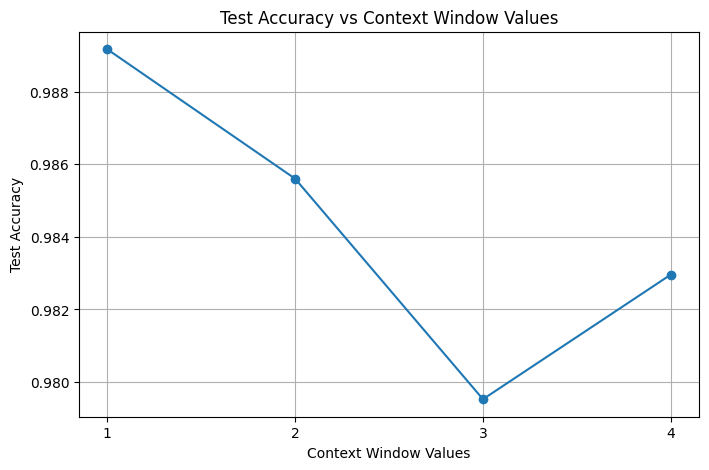

In [ ]:
import matplotlib.pyplot as plt


context_window_values = [1, 2, 3, 4]
test_accuracies = [0.9891691982565051, 0.9856029586580373, 0.9795271430458328, 0.9829612996962093]

plt.figure(figsize=(8, 5))
plt.plot(context_window_values, test_accuracies, marker='o', linestyle='-')
plt.title('Test Accuracy vs Context Window Values')
plt.xlabel('Context Window Values')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(context_window_values)  
plt.show()

In [ ]:
import itertools

embedding_dims = [100, 200]
hidden_dims1 = [512, 256]
hidden_dims2 = [128, 64]
activations = ['ReLU', 'Tanh']

results = []

for emb_dim, hid_dim1, hid_dim2, activation in itertools.product(embedding_dims, hidden_dims1, hidden_dims2, activations):
    print(f"Training model with embedding_dim={emb_dim}, hidden_dim1={hid_dim1}, hidden_dim2={hid_dim2}, activation={activation}")

    model = FFN_POS_Tagger(input_dim, hid_dim1, hid_dim2, output_dim, activation).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train(model, train_dataloader, dev_dataloader, criterion, optimizer, device)

    dev_accuracy = calculate_accuracy_ffnn(model, dev_dataloader, device)

    test_accuracy = test(model, test_dataloader, criterion, device)

    results.append({
        'embedding_dim': emb_dim,
        'hidden_dim1': hid_dim1,
        'hidden_dim2': hid_dim2,
        'activation': activation,
        'dev_accuracy': dev_accuracy,
        'test_accuracy': test_accuracy
    })

print("\nHyperparameter Tuning Results:")
print("----------------------------------------------------------")
print("| Embedding Dim | Hidden Dim 1 | Hidden Dim 2 | Activation | Dev Accuracy | Test Accuracy |")
print("----------------------------------------------------------")
for res in results:
    print(f"| {res['embedding_dim']:13} | {res['hidden_dim1']:12} | {res['hidden_dim2']:12} | {res['activation']:10} | {res['dev_accuracy']:12.4f} | {res['test_accuracy']:13.4f} |")
print("----------------------------------------------------------")


Training model with embedding_dim=100, hidden_dim1=512, hidden_dim2=128, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:38<00:00, 45.54batch/s]


Epoch 1/10, Loss: 0.1401735265893928


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 309.32batch/s]


Validation Loss: 0.07155412154740795, Accuracy: 0.9743353514082653


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.70batch/s]


Epoch 2/10, Loss: 0.0588116523924317


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 299.49batch/s]


Validation Loss: 0.06895854919832131, Accuracy: 0.9828902342721769


Epoch 3/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.96batch/s]


Epoch 3/10, Loss: 0.04861113329646676


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 309.91batch/s]


Validation Loss: 0.062218439873129895, Accuracy: 0.9847328244274809


Epoch 4/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.55batch/s]


Epoch 4/10, Loss: 0.043109188539460386


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 177.26batch/s]


Validation Loss: 0.06040189032126578, Accuracy: 0.9834166886022637


Epoch 5/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.51batch/s]


Epoch 5/10, Loss: 0.04070335324900017


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 306.35batch/s]


Validation Loss: 0.0734781965903731, Accuracy: 0.983285075019742


Epoch 6/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.19batch/s]


Epoch 6/10, Loss: 0.03669150788418639


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 294.23batch/s]


Validation Loss: 0.07228239517057429, Accuracy: 0.983285075019742


Epoch 7/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.38batch/s]


Epoch 7/10, Loss: 0.036011651901820936


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 313.03batch/s]


Validation Loss: 0.06849566578878258, Accuracy: 0.9838115293498289


Epoch 8/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.73batch/s]


Epoch 8/10, Loss: 0.03400401158779252


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 180.36batch/s]


Validation Loss: 0.06886729910093936, Accuracy: 0.9840747565148723


Epoch 9/10: 100%|██████████| 1750/1750 [00:36<00:00, 47.42batch/s]


Epoch 9/10, Loss: 0.03323426528656114


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 240.37batch/s]


Validation Loss: 0.07655733140480328, Accuracy: 0.9855225059226113


Epoch 10/10: 100%|██████████| 1750/1750 [00:37<00:00, 46.12batch/s]


Epoch 10/10, Loss: 0.03174509912168849


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 191.53batch/s]


Validation Loss: 0.07899428485003378, Accuracy: 0.9843379836799158


Testing: 100%|██████████| 237/237 [00:02<00:00, 106.93batch/s]


Test Loss: 0.05641510935799391, Accuracy: 0.9857350416061287
Training model with embedding_dim=100, hidden_dim1=512, hidden_dim2=128, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.10batch/s]


Epoch 1/10, Loss: 0.13930828757564137


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 304.80batch/s]


Validation Loss: 0.0811541184744829, Accuracy: 0.9677546722821795


Epoch 2/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.84batch/s]


Epoch 2/10, Loss: 0.0636599609284063


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 297.19batch/s]


Validation Loss: 0.07523868871537749, Accuracy: 0.9747301921558305


Epoch 3/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.23batch/s]


Epoch 3/10, Loss: 0.05460806354504478


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 298.30batch/s]


Validation Loss: 0.057679400355956215, Accuracy: 0.98236377994209


Epoch 4/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.91batch/s]


Epoch 4/10, Loss: 0.049161729519338615


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.00batch/s]


Validation Loss: 0.06586163177080609, Accuracy: 0.9836799157673072


Epoch 5/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.40batch/s]


Epoch 5/10, Loss: 0.04607862487626595


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 230.86batch/s]


Validation Loss: 0.06582811463317548, Accuracy: 0.9828902342721769


Epoch 6/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.90batch/s]


Epoch 6/10, Loss: 0.04481570829204117


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.02batch/s]


Validation Loss: 0.06052621133821653, Accuracy: 0.9834166886022637


Epoch 7/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.47batch/s]


Epoch 7/10, Loss: 0.04135155543117019


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 293.15batch/s]


Validation Loss: 0.06574129930558832, Accuracy: 0.9830218478546986


Epoch 8/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.05batch/s]


Epoch 8/10, Loss: 0.039610824616260025


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 303.72batch/s]


Validation Loss: 0.06387674891515371, Accuracy: 0.9824953935246118


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.33batch/s]


Epoch 9/10, Loss: 0.03832745420607638


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 219.39batch/s]


Validation Loss: 0.06254374979000525, Accuracy: 0.9836799157673072


Epoch 10/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.19batch/s]


Epoch 10/10, Loss: 0.03836099694566552


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 289.90batch/s]


Validation Loss: 0.06095259889428105, Accuracy: 0.9835483021847855


Testing: 100%|██████████| 237/237 [00:00<00:00, 289.40batch/s]


Test Loss: 0.046855786514791706, Accuracy: 0.9895654471007793
Training model with embedding_dim=100, hidden_dim1=512, hidden_dim2=64, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.45batch/s]


Epoch 1/10, Loss: 0.15060195452972713


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 287.74batch/s]


Validation Loss: 0.07433800241103329, Accuracy: 0.9801263490392208


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.68batch/s]


Epoch 2/10, Loss: 0.0595824329926649


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.39batch/s]


Validation Loss: 0.06538043155154152, Accuracy: 0.9838115293498289


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.05batch/s]


Epoch 3/10, Loss: 0.04994706381810829


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 292.86batch/s]


Validation Loss: 0.058626938085779776, Accuracy: 0.9864438010002632


Epoch 4/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.40batch/s]


Epoch 4/10, Loss: 0.04387016113573087


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 315.98batch/s]


Validation Loss: 0.06902372060537017, Accuracy: 0.9827586206896551


Epoch 5/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.56batch/s]


Epoch 5/10, Loss: 0.039445771773045375


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 309.68batch/s]


Validation Loss: 0.06226037820753096, Accuracy: 0.986575414582785


Epoch 6/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.05batch/s]


Epoch 6/10, Loss: 0.03840793947795386


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.66batch/s]


Validation Loss: 0.10317776779568497, Accuracy: 0.9776256909713082


Epoch 7/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.13batch/s]


Epoch 7/10, Loss: 0.03617423056890818


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 297.36batch/s]


Validation Loss: 0.07499317802536526, Accuracy: 0.983285075019742


Epoch 8/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.57batch/s]


Epoch 8/10, Loss: 0.03332841601194481


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 286.79batch/s]


Validation Loss: 0.06975781394293099, Accuracy: 0.9835483021847855


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.67batch/s]


Epoch 9/10, Loss: 0.03375830224748539


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 180.70batch/s]


Validation Loss: 0.0740168265694254, Accuracy: 0.9856541195051329


Epoch 10/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.83batch/s]


Epoch 10/10, Loss: 0.03055052004359355


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 287.21batch/s]


Validation Loss: 0.0754151422213301, Accuracy: 0.9852592787575678


Testing: 100%|██████████| 237/237 [00:00<00:00, 305.35batch/s]


Test Loss: 0.05153630785120385, Accuracy: 0.9879804517236824
Training model with embedding_dim=100, hidden_dim1=512, hidden_dim2=64, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.37batch/s]


Epoch 1/10, Loss: 0.1466621619768973


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 284.70batch/s]


Validation Loss: 0.0737038592173534, Accuracy: 0.9799947354566991


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.02batch/s]


Epoch 2/10, Loss: 0.06376346977241337


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 285.23batch/s]


Validation Loss: 0.061408050311338, Accuracy: 0.9828902342721769


Epoch 3/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.07batch/s]


Epoch 3/10, Loss: 0.05381740341718042


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 244.15batch/s]


Validation Loss: 0.06667792982558285, Accuracy: 0.9819689391945249


Epoch 4/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.71batch/s]


Epoch 4/10, Loss: 0.049722999691780255


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 314.91batch/s]


Validation Loss: 0.06497924680407785, Accuracy: 0.9824953935246118


Epoch 5/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.16batch/s]


Epoch 5/10, Loss: 0.04671587590607149


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 283.15batch/s]


Validation Loss: 0.06003091353377691, Accuracy: 0.98236377994209


Epoch 6/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.36batch/s]


Epoch 6/10, Loss: 0.04458977292537124


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 277.99batch/s]


Validation Loss: 0.0573569251456251, Accuracy: 0.9844695972624374


Epoch 7/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.89batch/s]


Epoch 7/10, Loss: 0.04334318945605108


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 261.98batch/s]


Validation Loss: 0.05914795867650684, Accuracy: 0.9819689391945249


Epoch 8/10: 100%|██████████| 1750/1750 [00:33<00:00, 53.00batch/s]


Epoch 8/10, Loss: 0.0403213888492402


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 292.54batch/s]


Validation Loss: 0.06259394751127004, Accuracy: 0.9838115293498289


Epoch 9/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.34batch/s]


Epoch 9/10, Loss: 0.040282930743198705


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 295.17batch/s]


Validation Loss: 0.06202630062224128, Accuracy: 0.9831534614372203


Epoch 10/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.26batch/s]


Epoch 10/10, Loss: 0.03873833587122915


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 301.40batch/s]


Validation Loss: 0.06667733733934064, Accuracy: 0.9824953935246118


Testing: 100%|██████████| 237/237 [00:00<00:00, 294.01batch/s]


Test Loss: 0.04885005419647748, Accuracy: 0.9886408664641395
Training model with embedding_dim=100, hidden_dim1=256, hidden_dim2=128, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:30<00:00, 57.01batch/s]


Epoch 1/10, Loss: 0.15648452948665778


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 320.55batch/s]


Validation Loss: 0.06476536691394251, Accuracy: 0.98236377994209


Epoch 2/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.82batch/s]


Epoch 2/10, Loss: 0.06188511379665163


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 294.29batch/s]


Validation Loss: 0.06473364936507761, Accuracy: 0.9821005527770466


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.13batch/s]


Epoch 3/10, Loss: 0.049580953350648216


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 314.07batch/s]


Validation Loss: 0.07933298839872972, Accuracy: 0.980521189786786


Epoch 4/10: 100%|██████████| 1750/1750 [00:30<00:00, 56.85batch/s]


Epoch 4/10, Loss: 0.044190835871577815


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 319.90batch/s]


Validation Loss: 0.05493997127403326, Accuracy: 0.9849960515925243


Epoch 5/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.07batch/s]


Epoch 5/10, Loss: 0.0403363471728366


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 324.26batch/s]


Validation Loss: 0.06986282598038332, Accuracy: 0.9810476441168728


Epoch 6/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.35batch/s]


Epoch 6/10, Loss: 0.03802213421706983


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 190.01batch/s]


Validation Loss: 0.06400889580266672, Accuracy: 0.9840747565148723


Epoch 7/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.00batch/s]


Epoch 7/10, Loss: 0.03595367078398184


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 305.11batch/s]


Validation Loss: 0.08123525041284718, Accuracy: 0.9806528033693077


Epoch 8/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.92batch/s]


Epoch 8/10, Loss: 0.034816521477112214


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 310.40batch/s]


Validation Loss: 0.0625876569682578, Accuracy: 0.9859173466701764


Epoch 9/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.40batch/s]


Epoch 9/10, Loss: 0.03263891970028713


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 304.04batch/s]


Validation Loss: 0.08081299335564086, Accuracy: 0.9835483021847855


Epoch 10/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.59batch/s]


Epoch 10/10, Loss: 0.0315407737800984


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.67batch/s]


Validation Loss: 0.07155111406840461, Accuracy: 0.9842063700973941


Testing: 100%|██████████| 237/237 [00:00<00:00, 308.52batch/s]


Test Loss: 0.04599882841824409, Accuracy: 0.9893012812045965
Training model with embedding_dim=100, hidden_dim1=256, hidden_dim2=128, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:36<00:00, 47.98batch/s]


Epoch 1/10, Loss: 0.14857664453284816


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 307.49batch/s]


Validation Loss: 0.07351312115289536, Accuracy: 0.9743353514082653


Epoch 2/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.13batch/s]


Epoch 2/10, Loss: 0.06328856092861056


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 267.89batch/s]


Validation Loss: 0.06330016125389766, Accuracy: 0.9813108712819163


Epoch 3/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.87batch/s]


Epoch 3/10, Loss: 0.05236332565614222


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 317.62batch/s]


Validation Loss: 0.059428140722575185, Accuracy: 0.9813108712819163


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.66batch/s]


Epoch 4/10, Loss: 0.046157404858128366


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 284.14batch/s]


Validation Loss: 0.05797975414475141, Accuracy: 0.9834166886022637


Epoch 5/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.39batch/s]


Epoch 5/10, Loss: 0.042746767078177074


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 252.22batch/s]


Validation Loss: 0.09334308612358487, Accuracy: 0.9728876020005265


Epoch 6/10: 100%|██████████| 1750/1750 [00:30<00:00, 56.65batch/s]


Epoch 6/10, Loss: 0.04014118804705296


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 318.76batch/s]


Validation Loss: 0.05097891142311312, Accuracy: 0.9855225059226113


Epoch 7/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.90batch/s]


Epoch 7/10, Loss: 0.03845064975357881


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 297.73batch/s]


Validation Loss: 0.057688491459311764, Accuracy: 0.9846012108449592


Epoch 8/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.17batch/s]


Epoch 8/10, Loss: 0.03617900147714785


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 178.10batch/s]


Validation Loss: 0.056389194621497614, Accuracy: 0.9843379836799158


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.01batch/s]


Epoch 9/10, Loss: 0.034897535893326025


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 270.52batch/s]


Validation Loss: 0.05195979487221588, Accuracy: 0.9849960515925243


Epoch 10/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.22batch/s]


Epoch 10/10, Loss: 0.034108367566289544


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 267.84batch/s]


Validation Loss: 0.05610337938508435, Accuracy: 0.9844695972624374


Testing: 100%|██████████| 237/237 [00:00<00:00, 297.05batch/s]


Test Loss: 0.04086311788239, Accuracy: 0.989829612996962
Training model with embedding_dim=100, hidden_dim1=256, hidden_dim2=64, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.67batch/s]


Epoch 1/10, Loss: 0.17346545197468782


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 289.58batch/s]


Validation Loss: 0.06952856710469722, Accuracy: 0.979599894709134


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.78batch/s]


Epoch 2/10, Loss: 0.06402275352266484


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 161.16batch/s]


Validation Loss: 0.0669404550143317, Accuracy: 0.9826270071071335


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.75batch/s]


Epoch 3/10, Loss: 0.05075936285123628


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 286.25batch/s]


Validation Loss: 0.06430067922368483, Accuracy: 0.9839431429323506


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.26batch/s]


Epoch 4/10, Loss: 0.044982200623714434


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.51batch/s]


Validation Loss: 0.08519220845152609, Accuracy: 0.9745985785733088


Epoch 5/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.94batch/s]


Epoch 5/10, Loss: 0.041381732454232406


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 181.53batch/s]


Validation Loss: 0.0632949545590022, Accuracy: 0.9843379836799158


Epoch 6/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.26batch/s]


Epoch 6/10, Loss: 0.037460042725992806


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.05batch/s]


Validation Loss: 0.06541652974293287, Accuracy: 0.9838115293498289


Epoch 7/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.65batch/s]


Epoch 7/10, Loss: 0.036926144668677545


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 307.55batch/s]


Validation Loss: 0.05752086353758761, Accuracy: 0.985127665175046


Epoch 8/10: 100%|██████████| 1750/1750 [00:30<00:00, 56.57batch/s]


Epoch 8/10, Loss: 0.03423523892034635


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 309.87batch/s]


Validation Loss: 0.07096656437196154, Accuracy: 0.9824953935246118


Epoch 9/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.07batch/s]


Epoch 9/10, Loss: 0.03274174568231943


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 320.12batch/s]


Validation Loss: 0.06546086600957181, Accuracy: 0.9852592787575678


Epoch 10/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.62batch/s]


Epoch 10/10, Loss: 0.03146899061952146


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 204.46batch/s]


Validation Loss: 0.07515414843482857, Accuracy: 0.9848644380100027


Testing: 100%|██████████| 237/237 [00:00<00:00, 307.49batch/s]


Test Loss: 0.048106296872566234, Accuracy: 0.9881125346717738
Training model with embedding_dim=100, hidden_dim1=256, hidden_dim2=64, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.18batch/s]


Epoch 1/10, Loss: 0.16416505696571299


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 318.23batch/s]


Validation Loss: 0.07875917137487001, Accuracy: 0.9778889181363517


Epoch 2/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.38batch/s]


Epoch 2/10, Loss: 0.06283289924643136


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 319.04batch/s]


Validation Loss: 0.059415735397047656, Accuracy: 0.9824953935246118


Epoch 3/10: 100%|██████████| 1750/1750 [00:30<00:00, 57.18batch/s]


Epoch 3/10, Loss: 0.05235156167223717


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 169.60batch/s]


Validation Loss: 0.08162760643981605, Accuracy: 0.9734140563306133


Epoch 4/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.07batch/s]


Epoch 4/10, Loss: 0.045354403849458325


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 317.56batch/s]


Validation Loss: 0.05856142102630893, Accuracy: 0.9840747565148723


Epoch 5/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.90batch/s]


Epoch 5/10, Loss: 0.04246757187582885


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 300.39batch/s]


Validation Loss: 0.06059531214899636, Accuracy: 0.983285075019742


Epoch 6/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.40batch/s]


Epoch 6/10, Loss: 0.04026027941104258


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 305.00batch/s]


Validation Loss: 0.055441148227062115, Accuracy: 0.9852592787575678


Epoch 7/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.28batch/s]


Epoch 7/10, Loss: 0.03719732300882294


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 305.51batch/s]


Validation Loss: 0.060717862196075396, Accuracy: 0.9836799157673072


Epoch 8/10: 100%|██████████| 1750/1750 [00:30<00:00, 57.07batch/s]


Epoch 8/10, Loss: 0.03663464226002439


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 198.35batch/s]


Validation Loss: 0.0607086839665514, Accuracy: 0.9827586206896551


Epoch 9/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.78batch/s]


Epoch 9/10, Loss: 0.034985026594197347


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 295.30batch/s]


Validation Loss: 0.0607484983882677, Accuracy: 0.9848644380100027


Epoch 10/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.36batch/s]


Epoch 10/10, Loss: 0.03417963810291258


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 300.08batch/s]


Validation Loss: 0.06604907067933809, Accuracy: 0.9826270071071335


Testing: 100%|██████████| 237/237 [00:00<00:00, 302.89batch/s]


Test Loss: 0.05396412989323102, Accuracy: 0.9870558710870426
Training model with embedding_dim=200, hidden_dim1=512, hidden_dim2=128, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.38batch/s]


Epoch 1/10, Loss: 0.14231458382720927


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 280.50batch/s]


Validation Loss: 0.08464028223301773, Accuracy: 0.9701237167675704


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.87batch/s]


Epoch 2/10, Loss: 0.059473490351245606


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 180.87batch/s]


Validation Loss: 0.06203443017423088, Accuracy: 0.9828902342721769


Epoch 3/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.63batch/s]


Epoch 3/10, Loss: 0.0498926794940323


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 297.43batch/s]


Validation Loss: 0.06330430264852341, Accuracy: 0.9819689391945249


Epoch 4/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.53batch/s]


Epoch 4/10, Loss: 0.04432128644778277


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 306.19batch/s]


Validation Loss: 0.06579426368245106, Accuracy: 0.9824953935246118


Epoch 5/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.60batch/s]


Epoch 5/10, Loss: 0.04020199666327868


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 286.51batch/s]


Validation Loss: 0.07453184003954921, Accuracy: 0.9815740984469598


Epoch 6/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.20batch/s]


Epoch 6/10, Loss: 0.038263575621786526


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 281.81batch/s]


Validation Loss: 0.07101176950010551, Accuracy: 0.9838115293498289


Epoch 7/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.85batch/s]


Epoch 7/10, Loss: 0.03542244301003731


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 187.43batch/s]


Validation Loss: 0.07729240720807469, Accuracy: 0.9798631218741775


Epoch 8/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.89batch/s]


Epoch 8/10, Loss: 0.03400055837514576


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 288.76batch/s]


Validation Loss: 0.07530698543596066, Accuracy: 0.9857857330876546


Epoch 9/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.12batch/s]


Epoch 9/10, Loss: 0.033629997587509904


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 290.04batch/s]


Validation Loss: 0.07888575146199293, Accuracy: 0.9835483021847855


Epoch 10/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.86batch/s]


Epoch 10/10, Loss: 0.032970086045678436


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 294.62batch/s]


Validation Loss: 0.08339833521782153, Accuracy: 0.9842063700973941


Testing: 100%|██████████| 237/237 [00:00<00:00, 297.96batch/s]


Test Loss: 0.05646893401900201, Accuracy: 0.987187954035134
Training model with embedding_dim=200, hidden_dim1=512, hidden_dim2=128, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.93batch/s]


Epoch 1/10, Loss: 0.13987973592689792


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 283.52batch/s]


Validation Loss: 0.08644200564056885, Accuracy: 0.9701237167675704


Epoch 2/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.72batch/s]


Epoch 2/10, Loss: 0.0632853796618292


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 293.94batch/s]


Validation Loss: 0.06497925758937045, Accuracy: 0.9809160305343512


Epoch 3/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.60batch/s]


Epoch 3/10, Loss: 0.05475105882801914


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 204.35batch/s]


Validation Loss: 0.06323349579484906, Accuracy: 0.981442484864438


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.18batch/s]


Epoch 4/10, Loss: 0.04944398855364748


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 291.68batch/s]


Validation Loss: 0.05495833176448149, Accuracy: 0.9839431429323506


Epoch 5/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.40batch/s]


Epoch 5/10, Loss: 0.045354582479190345


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 289.71batch/s]


Validation Loss: 0.06052024438395165, Accuracy: 0.9839431429323506


Epoch 6/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.02batch/s]


Epoch 6/10, Loss: 0.04286755903593231


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 296.77batch/s]


Validation Loss: 0.056404771792188536, Accuracy: 0.9848644380100027


Epoch 7/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.19batch/s]


Epoch 7/10, Loss: 0.04069658307599769


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 289.53batch/s]


Validation Loss: 0.05515239017642839, Accuracy: 0.9849960515925243


Epoch 8/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.42batch/s]


Epoch 8/10, Loss: 0.03867663191764067


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 177.46batch/s]


Validation Loss: 0.05712654987340813, Accuracy: 0.9815740984469598


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.21batch/s]


Epoch 9/10, Loss: 0.04010214475758507


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 276.88batch/s]


Validation Loss: 0.06574964225588135, Accuracy: 0.9827586206896551


Epoch 10/10: 100%|██████████| 1750/1750 [00:34<00:00, 51.37batch/s]


Epoch 10/10, Loss: 0.037335725961885016


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 291.48batch/s]


Validation Loss: 0.060755867357627474, Accuracy: 0.9844695972624374


Testing: 100%|██████████| 237/237 [00:00<00:00, 287.33batch/s]


Test Loss: 0.04933314532278433, Accuracy: 0.9877162858274997
Training model with embedding_dim=200, hidden_dim1=512, hidden_dim2=64, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.58batch/s]


Epoch 1/10, Loss: 0.15085198480576012


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 313.53batch/s]


Validation Loss: 0.06845003120114972, Accuracy: 0.9764411687286128


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.69batch/s]


Epoch 2/10, Loss: 0.061699428949006166


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 303.40batch/s]


Validation Loss: 0.06880849730084013, Accuracy: 0.9797315082916557


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.08batch/s]


Epoch 3/10, Loss: 0.04922971313740293


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 178.51batch/s]


Validation Loss: 0.06223049154697732, Accuracy: 0.9836799157673072


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.12batch/s]


Epoch 4/10, Loss: 0.04416699336780584


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 308.11batch/s]


Validation Loss: 0.07038903084615131, Accuracy: 0.9769676230586997


Epoch 5/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.96batch/s]


Epoch 5/10, Loss: 0.039778123050930196


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 292.62batch/s]


Validation Loss: 0.06327147395095074, Accuracy: 0.9857857330876546


Epoch 6/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.24batch/s]


Epoch 6/10, Loss: 0.0371556430281458


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 287.05batch/s]


Validation Loss: 0.06839425549871155, Accuracy: 0.9843379836799158


Epoch 7/10: 100%|██████████| 1750/1750 [00:37<00:00, 47.26batch/s]


Epoch 7/10, Loss: 0.035492301844582214


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 287.51batch/s]


Validation Loss: 0.06884715864768867, Accuracy: 0.9838115293498289


Epoch 8/10: 100%|██████████| 1750/1750 [00:35<00:00, 48.83batch/s]


Epoch 8/10, Loss: 0.0346394737642643


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 280.21batch/s]


Validation Loss: 0.0727010961250131, Accuracy: 0.9846012108449592


Epoch 9/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.63batch/s]


Epoch 9/10, Loss: 0.03298518505992206


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 263.87batch/s]


Validation Loss: 0.06992850585869624, Accuracy: 0.985127665175046


Epoch 10/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.17batch/s]


Epoch 10/10, Loss: 0.03096608798719756


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 171.85batch/s]


Validation Loss: 0.0788127032332536, Accuracy: 0.9838115293498289


Testing: 100%|██████████| 237/237 [00:00<00:00, 286.22batch/s]


Test Loss: 0.05151900908007335, Accuracy: 0.9882446176198653
Training model with embedding_dim=200, hidden_dim1=512, hidden_dim2=64, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.54batch/s]


Epoch 1/10, Loss: 0.15014795523948435


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 168.30batch/s]


Validation Loss: 0.0726622235051458, Accuracy: 0.9777573045538299


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.52batch/s]


Epoch 2/10, Loss: 0.06457247098901175


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 272.60batch/s]


Validation Loss: 0.07914980357276089, Accuracy: 0.976836009476178


Epoch 3/10: 100%|██████████| 1750/1750 [00:35<00:00, 48.67batch/s]


Epoch 3/10, Loss: 0.05624283929102655


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 261.90batch/s]


Validation Loss: 0.0636175282423271, Accuracy: 0.98236377994209


Epoch 4/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.25batch/s]


Epoch 4/10, Loss: 0.04967465560813435


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 247.72batch/s]


Validation Loss: 0.06391806053714298, Accuracy: 0.9836799157673072


Epoch 5/10: 100%|██████████| 1750/1750 [00:36<00:00, 48.09batch/s]


Epoch 5/10, Loss: 0.04628073142157934


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 254.03batch/s]


Validation Loss: 0.0641846713590917, Accuracy: 0.9822321663595683


Epoch 6/10: 100%|██████████| 1750/1750 [00:35<00:00, 48.97batch/s]


Epoch 6/10, Loss: 0.04263123977042103


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 281.59batch/s]


Validation Loss: 0.0613909834971898, Accuracy: 0.9827586206896551


Epoch 7/10: 100%|██████████| 1750/1750 [00:36<00:00, 47.73batch/s]


Epoch 7/10, Loss: 0.042709194495991275


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 277.77batch/s]


Validation Loss: 0.059172938038064796, Accuracy: 0.9838115293498289


Epoch 8/10: 100%|██████████| 1750/1750 [00:35<00:00, 49.56batch/s]


Epoch 8/10, Loss: 0.041826120895832514


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 241.96batch/s]


Validation Loss: 0.058392406606356057, Accuracy: 0.9855225059226113


Epoch 9/10: 100%|██████████| 1750/1750 [00:34<00:00, 50.11batch/s]


Epoch 9/10, Loss: 0.03899382798440222


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 198.29batch/s]


Validation Loss: 0.05336751579906216, Accuracy: 0.9867070281653066


Epoch 10/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.98batch/s]


Epoch 10/10, Loss: 0.0365632045824563


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 219.00batch/s]


Validation Loss: 0.057125504486685415, Accuracy: 0.983285075019742


Testing: 100%|██████████| 237/237 [00:01<00:00, 191.96batch/s]


Test Loss: 0.04463872775685471, Accuracy: 0.9878483687755911
Training model with embedding_dim=200, hidden_dim1=256, hidden_dim2=128, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.40batch/s]


Epoch 1/10, Loss: 0.1573046471667476


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 284.17batch/s]


Validation Loss: 0.0780630504759909, Accuracy: 0.9793366675440905


Epoch 2/10: 100%|██████████| 1750/1750 [00:33<00:00, 51.64batch/s]


Epoch 2/10, Loss: 0.061717827206311214


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 308.98batch/s]


Validation Loss: 0.059182018782780114, Accuracy: 0.9835483021847855


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.47batch/s]


Epoch 3/10, Loss: 0.05049994916698363


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 300.91batch/s]


Validation Loss: 0.06828879693170502, Accuracy: 0.9809160305343512


Epoch 4/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.40batch/s]


Epoch 4/10, Loss: 0.0454390110135199


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 301.26batch/s]


Validation Loss: 0.06283600596181423, Accuracy: 0.9839431429323506


Epoch 5/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.46batch/s]


Epoch 5/10, Loss: 0.04103493910643738


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 319.72batch/s]


Validation Loss: 0.07030702272372039, Accuracy: 0.983285075019742


Epoch 6/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.80batch/s]


Epoch 6/10, Loss: 0.038401576594374744


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 301.91batch/s]


Validation Loss: 0.06479200074362543, Accuracy: 0.9834166886022637


Epoch 7/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.82batch/s]


Epoch 7/10, Loss: 0.03603318012576892


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 298.97batch/s]


Validation Loss: 0.06727926651892095, Accuracy: 0.9848644380100027


Epoch 8/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.14batch/s]


Epoch 8/10, Loss: 0.03302668066914235


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 310.10batch/s]


Validation Loss: 0.07232170302637972, Accuracy: 0.9843379836799158


Epoch 9/10: 100%|██████████| 1750/1750 [00:33<00:00, 52.95batch/s]


Epoch 9/10, Loss: 0.03384254045230305


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 308.86batch/s]


Validation Loss: 0.07994554843698357, Accuracy: 0.9838115293498289


Epoch 10/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.84batch/s]


Epoch 10/10, Loss: 0.031623335119739554


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 304.41batch/s]


Validation Loss: 0.07086129307232637, Accuracy: 0.9842063700973941


Testing: 100%|██████████| 237/237 [00:01<00:00, 178.55batch/s]


Test Loss: 0.04718369026916198, Accuracy: 0.9891691982565051
Training model with embedding_dim=200, hidden_dim1=256, hidden_dim2=128, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.48batch/s]


Epoch 1/10, Loss: 0.14858040181986457


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 277.58batch/s]


Validation Loss: 0.07749080546190493, Accuracy: 0.981442484864438


Epoch 2/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.94batch/s]


Epoch 2/10, Loss: 0.06332668489191148


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 296.18batch/s]


Validation Loss: 0.06592458057116538, Accuracy: 0.9818373256120032


Epoch 3/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.45batch/s]


Epoch 3/10, Loss: 0.052039640250399574


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 169.99batch/s]


Validation Loss: 0.05868149966139937, Accuracy: 0.9822321663595683


Epoch 4/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.88batch/s]


Epoch 4/10, Loss: 0.04658864479177698


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 309.08batch/s]


Validation Loss: 0.05504365630280089, Accuracy: 0.9839431429323506


Epoch 5/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.70batch/s]


Epoch 5/10, Loss: 0.04283619878349626


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 312.00batch/s]


Validation Loss: 0.06967603700083119, Accuracy: 0.9809160305343512


Epoch 6/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.24batch/s]


Epoch 6/10, Loss: 0.039798093662655444


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 313.09batch/s]


Validation Loss: 0.06047453267318578, Accuracy: 0.9822321663595683


Epoch 7/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.84batch/s]


Epoch 7/10, Loss: 0.03801682093001935


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.18batch/s]


Validation Loss: 0.06164006198157934, Accuracy: 0.9846012108449592


Epoch 8/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.38batch/s]


Epoch 8/10, Loss: 0.036345022432069524


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 294.54batch/s]


Validation Loss: 0.05959384892794486, Accuracy: 0.9842063700973941


Epoch 9/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.66batch/s]


Epoch 9/10, Loss: 0.03540715160212546


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 302.20batch/s]


Validation Loss: 0.05775978984499542, Accuracy: 0.975914714398526


Epoch 10/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.70batch/s]


Epoch 10/10, Loss: 0.034504311292922855


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 310.85batch/s]


Validation Loss: 0.05808089026655931, Accuracy: 0.986575414582785


Testing: 100%|██████████| 237/237 [00:00<00:00, 312.85batch/s]


Test Loss: 0.04499962973180114, Accuracy: 0.9904900277374191
Training model with embedding_dim=200, hidden_dim1=256, hidden_dim2=64, activation=ReLU


Epoch 1/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.24batch/s]


Epoch 1/10, Loss: 0.16172836272857552


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 307.87batch/s]


Validation Loss: 0.09330267146398008, Accuracy: 0.9693340352724401


Epoch 2/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.40batch/s]


Epoch 2/10, Loss: 0.062418040553041336


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 325.19batch/s]


Validation Loss: 0.07592974014948572, Accuracy: 0.9719663069228744


Epoch 3/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.56batch/s]


Epoch 3/10, Loss: 0.05127770463570986


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 313.87batch/s]


Validation Loss: 0.06127931738445709, Accuracy: 0.9843379836799158


Epoch 4/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.92batch/s]


Epoch 4/10, Loss: 0.04476432356399684


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 193.54batch/s]


Validation Loss: 0.06286937303446989, Accuracy: 0.9849960515925243


Epoch 5/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.07batch/s]


Epoch 5/10, Loss: 0.04167227343061885


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 314.61batch/s]


Validation Loss: 0.0635367944561353, Accuracy: 0.9836799157673072


Epoch 6/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.05batch/s]


Epoch 6/10, Loss: 0.03806507541883911


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 300.87batch/s]


Validation Loss: 0.06903311034462803, Accuracy: 0.9790734403790471


Epoch 7/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.01batch/s]


Epoch 7/10, Loss: 0.03671082524139742


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 273.72batch/s]


Validation Loss: 0.06384930120395224, Accuracy: 0.9847328244274809


Epoch 8/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.00batch/s]


Epoch 8/10, Loss: 0.03480059546390424


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 290.47batch/s]


Validation Loss: 0.0638216252219467, Accuracy: 0.9852592787575678


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.86batch/s]


Epoch 9/10, Loss: 0.03294198838927904


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 315.56batch/s]


Validation Loss: 0.08431358921366498, Accuracy: 0.9849960515925243


Epoch 10/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.71batch/s]


Epoch 10/10, Loss: 0.03229765590637206


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 312.06batch/s]


Validation Loss: 0.07404424895238884, Accuracy: 0.9838115293498289


Testing: 100%|██████████| 237/237 [00:01<00:00, 199.08batch/s]


Test Loss: 0.047762487288532364, Accuracy: 0.989829612996962
Training model with embedding_dim=200, hidden_dim1=256, hidden_dim2=64, activation=Tanh


Epoch 1/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.93batch/s]


Epoch 1/10, Loss: 0.15777266082234148


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 316.18batch/s]


Validation Loss: 0.06782938289835642, Accuracy: 0.9810476441168728


Epoch 2/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.68batch/s]


Epoch 2/10, Loss: 0.06088848087145016


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 311.37batch/s]


Validation Loss: 0.06371175934670165, Accuracy: 0.983285075019742


Epoch 3/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.40batch/s]


Epoch 3/10, Loss: 0.051751114731471586


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 317.02batch/s]


Validation Loss: 0.06368909384507467, Accuracy: 0.9807844169518294


Epoch 4/10: 100%|██████████| 1750/1750 [00:32<00:00, 54.49batch/s]


Epoch 4/10, Loss: 0.045825834015434205


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 319.86batch/s]


Validation Loss: 0.05909698710499523, Accuracy: 0.9840747565148723


Epoch 5/10: 100%|██████████| 1750/1750 [00:31<00:00, 56.22batch/s]


Epoch 5/10, Loss: 0.0424255477358321


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 177.72batch/s]


Validation Loss: 0.054698459928544205, Accuracy: 0.9849960515925243


Epoch 6/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.44batch/s]


Epoch 6/10, Loss: 0.0410356429303647


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 302.35batch/s]


Validation Loss: 0.06367333216762401, Accuracy: 0.9844695972624374


Epoch 7/10: 100%|██████████| 1750/1750 [00:31<00:00, 54.75batch/s]


Epoch 7/10, Loss: 0.03756673825245317


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 310.64batch/s]


Validation Loss: 0.05375857760666521, Accuracy: 0.9842063700973941


Epoch 8/10: 100%|██████████| 1750/1750 [00:30<00:00, 56.87batch/s]


Epoch 8/10, Loss: 0.037079770953860135


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 303.27batch/s]


Validation Loss: 0.05263644068149954, Accuracy: 0.9861805738352198


Epoch 9/10: 100%|██████████| 1750/1750 [00:32<00:00, 53.68batch/s]


Epoch 9/10, Loss: 0.03439645685674623


Evaluation: 100%|██████████| 238/238 [00:00<00:00, 316.10batch/s]


Validation Loss: 0.05814000614961568, Accuracy: 0.9844695972624374


Epoch 10/10: 100%|██████████| 1750/1750 [00:31<00:00, 55.80batch/s]


Epoch 10/10, Loss: 0.034705068797908356


Evaluation: 100%|██████████| 238/238 [00:01<00:00, 173.58batch/s]


Validation Loss: 0.059532580946554024, Accuracy: 0.9861805738352198


Testing: 100%|██████████| 237/237 [00:00<00:00, 313.21batch/s]

Test Loss: 0.04237151907258107, Accuracy: 0.9902258618412363

Hyperparameter Tuning Results:
----------------------------------------------------------
| Embedding Dim | Hidden Dim 1 | Hidden Dim 2 | Activation | Dev Accuracy | Test Accuracy |
----------------------------------------------------------
|           100 |          512 |          128 | ReLU       |       0.9843 |        0.9857 |
|           100 |          512 |          128 | Tanh       |       0.9835 |        0.9896 |
|           100 |          512 |           64 | ReLU       |       0.9853 |        0.9880 |
|           100 |          512 |           64 | Tanh       |       0.9825 |        0.9886 |
|           100 |          256 |          128 | ReLU       |       0.9842 |        0.9893 |
|           100 |          256 |          128 | Tanh       |       0.9845 |        0.9898 |
|           100 |          256 |           64 | ReLU       |       0.9849 |        0.9881 |
|           100 |          256 |           64 | Tanh 

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_performance(model, dataloader, device):
    model.eval()
    all_targets = []
    all_predictions = []
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Evaluating", unit="batch"):
            inputs, targets = inputs.to(device), targets.view(-1).to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, -1)
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.view(-1).cpu().numpy())

    accuracy = accuracy_score(all_targets, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_predictions, average='weighted')

    return accuracy, precision, recall, f1

print('Evaluation Metrics on train set')
traccuracy, trprecision, trrecall, trf1 = evaluate_performance(model, train_dataloader, device)
print(f"Accuracy: {traccuracy}")
print(f"Precision: {trprecision}")
print(f"Recall: {trrecall}")
print(f"F1 Score: {trf1}")

print('Evaluation Metrics on dev set')
daccuracy, dprecision, drecall, df1 = evaluate_performance(model, dev_dataloader, device)
print(f"Accuracy: {daccuracy}")
print(f"Precision: {dprecision}")
print(f"Recall: {drecall}")
print(f"F1 Score: {df1}")

print('Evaluation Metrics on test set')
taccuracy, tprecision, trecall, tf1 = evaluate_performance(model, test_dataloader, device)
print(f"Accuracy: {taccuracy}")
print(f"Precision: {tprecision}")
print(f"Recall: {trecall}")
print(f"F1 Score: {tf1}")


Evaluation Metrics on train set


Evaluating: 100%|██████████| 1750/1750 [00:17<00:00, 101.85batch/s]


Accuracy: 0.9904613900648411
Precision: 0.99062147312443
Recall: 0.9904613900648411
F1 Score: 0.9904583826166543
Evaluation Metrics on dev set


Evaluating: 100%|██████████| 238/238 [00:00<00:00, 313.23batch/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9847328244274809
Precision: 0.9846565046841257
Recall: 0.9847328244274809
F1 Score: 0.9845278451358083
Evaluation Metrics on test set


Evaluating: 100%|██████████| 237/237 [00:00<00:00, 499.15batch/s]

Accuracy: 0.9896975300488707
Precision: 0.9894888732377837
Recall: 0.9896975300488707
F1 Score: 0.9894902321728604


Dev set Confusion matrix


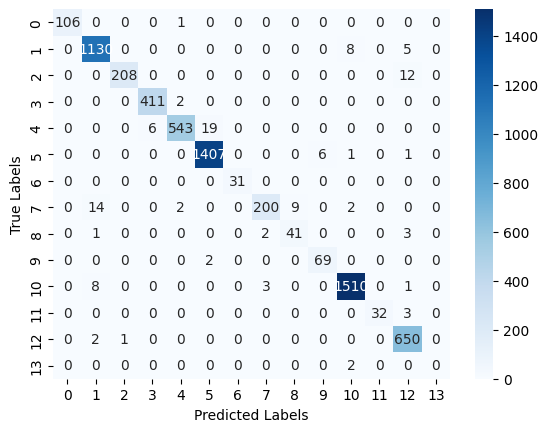

Test set Confusion matrix


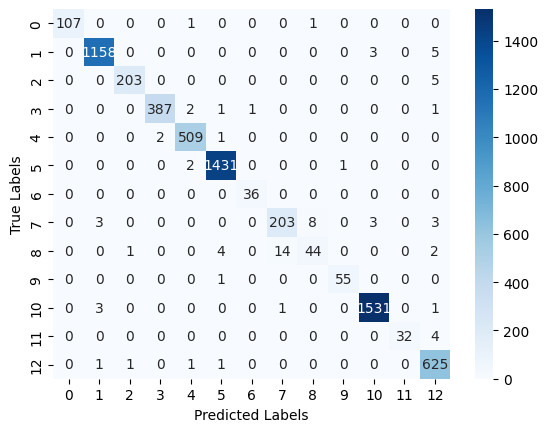

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def compute_and_plot_confusion_matrix(model, dataloader, device, tag_to_ix):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 2 if outputs.dim() > 2 else 1)
            all_preds.extend(predicted.view(-1).cpu().numpy())
            all_true.extend(targets.view(-1).cpu().numpy())

    pad_tag_id = tag_to_ix[PAD]
    filtered_preds = [pred for pred, true in zip(all_preds, all_true) if true != pad_tag_id]
    filtered_true = [true for true in all_true if true != pad_tag_id]

    cm = confusion_matrix(filtered_true, filtered_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

print('Dev set Confusion matrix')
compute_and_plot_confusion_matrix(model, dev_dataloader, device, tag_to_ix)
print('Test set Confusion matrix')
compute_and_plot_confusion_matrix(model, test_dataloader, device, tag_to_ix)


In [ ]:
torch.save(model.state_dict(), 'pos_tagger_model.pth')


In [ ]:
def preprocess_and_predict(sentence, word_to_ix, tag_to_ix, model, device, embedding_matrix, p, s):
    tokens = sentence.lower().split()
    processed_sentence = [PAD] + tokens + [PAD]
    predictions = []

    model.eval()
    with torch.no_grad():
        for i, token in enumerate(tokens):

            context_window = processed_sentence[max(0, i):i+p+1] + processed_sentence[i+1:min(i+1+s, len(processed_sentence))]

            context_indices = [word_to_ix.get(word, word_to_ix['<UNK>']) for word in context_window]

            while len(context_indices) < p + s + 1:
                context_indices.append(word_to_ix['<PAD>'])  
            context_tensor = torch.tensor([context_indices], dtype=torch.long).to(device)
            context_embeddings = embedding_matrix[context_tensor].view(1, -1)
            output = model(context_embeddings)
            predicted_tag_ix = output.argmax(1).item()
            predictions.append((token, list(tag_to_ix.keys())[list(tag_to_ix.values()).index(predicted_tag_ix)]))
            # print()

    return predictions

sentence = "An apple a day keeps the doctor away"
predicted_tags = preprocess_and_predict(sentence, word_to_ix, tag_to_ix, model, device, embedding_matrix, p, s)
for token, tag in predicted_tags:
    print(f"{token} : {tag}")


an : DET
apple : ADJ
a : DET
day : NOUN
keeps : VERB
the : DET
doctor : VERB
away : ADV


In [ ]:
model = FFN_POS_Tagger(embedding_dim * 3, 512, 128, len(tag_to_ix)).to(device)
model.load_state_dict(torch.load('pos_tagger_model.pth'))

sentence = "An apple a day keeps the doctor away"
predicted_tags = preprocess_and_predict(sentence, word_to_ix, tag_to_ix, model, device, embedding_matrix, p, s)
for token, tag in predicted_tags:
    print(f"{token}: {tag}")


Context Window for token 'an': ['<START>', 'an', 'apple']
Context Window for token 'apple': ['an', 'apple', 'a']
Context Window for token 'a': ['apple', 'a', 'day']
Context Window for token 'day': ['a', 'day', 'keeps']
Context Window for token 'keeps': ['day', 'keeps', 'the']
Context Window for token 'the': ['keeps', 'the', 'doctor']
Context Window for token 'doctor': ['the', 'doctor', 'away']
Context Window for token 'away': ['doctor', 'away', '<END>']
an: DET
apple: VERB
a: DET
day: NOUN
keeps: VERB
the: DET
doctor: VERB
away: ADV
